In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
# load the data frame
df = pd.read_csv('data/gapminder_data.csv')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
# get to know the data
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [4]:
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
dtype: int64

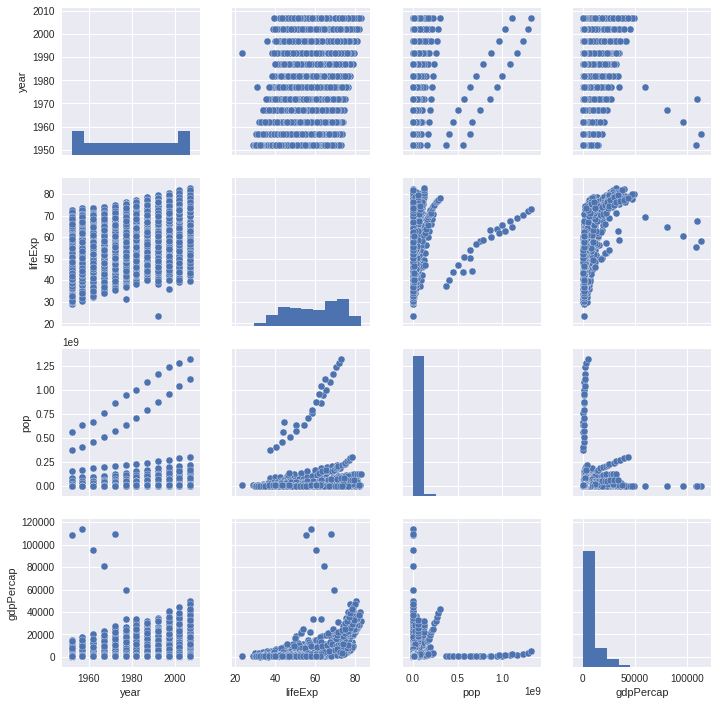

In [11]:
# the default pairs plot in seaborn only plots numerical columns
# The pairs plot builds on two basic figures, 
# the histogram and the scatter plot. 
# The histogram on the diagonal allows us to see the distribution of a single variable 
# while the scatter plots on the upper and lower triangles 
# show the relationship (or lack thereof) between two variables


sns.pairplot(df)
plt.show()

In [15]:
# since the distribution of pop and gdp_per_cap is heavily skewed to the right
# we take log transform of these columns to better understand this data
# logarithmic transformation is just a change of scale 
# that can help you visualize information more easily
df['log_pop'] = np.log10(df['pop'])
df['log_gdp_per_cap'] = np.log10(df['gdpPercap'])

df = df.drop(['pop', 'gdpPercap'], axis='columns')

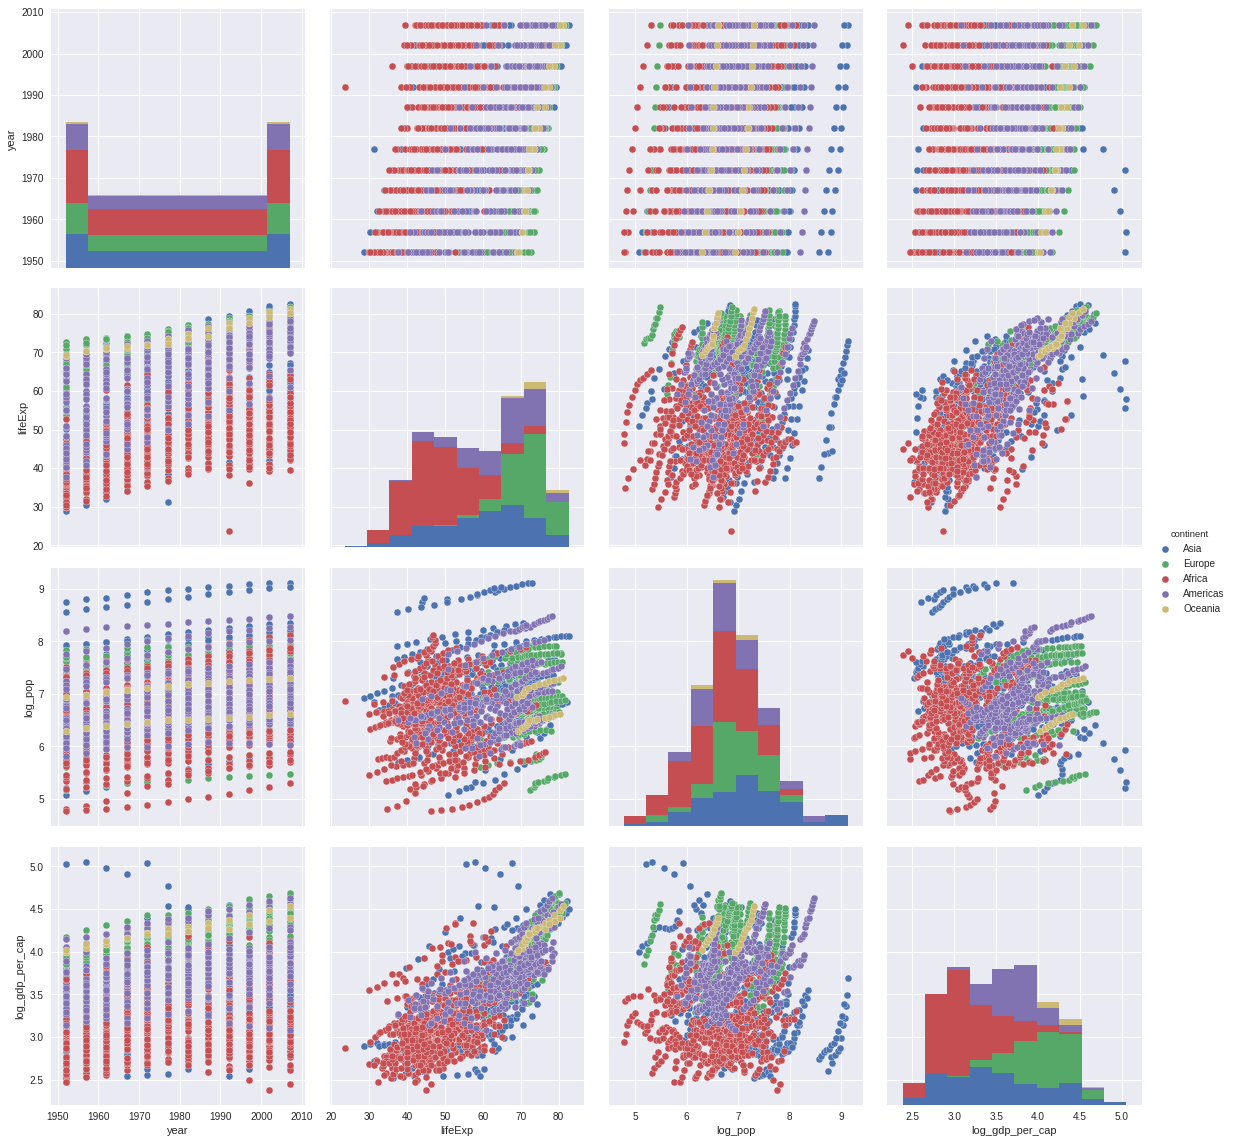

In [35]:
# we can better understand the data by coloring 
# the categorical variables such as the continent
sns.pairplot(df, hue = 'continent', size = 4)
plt.show()

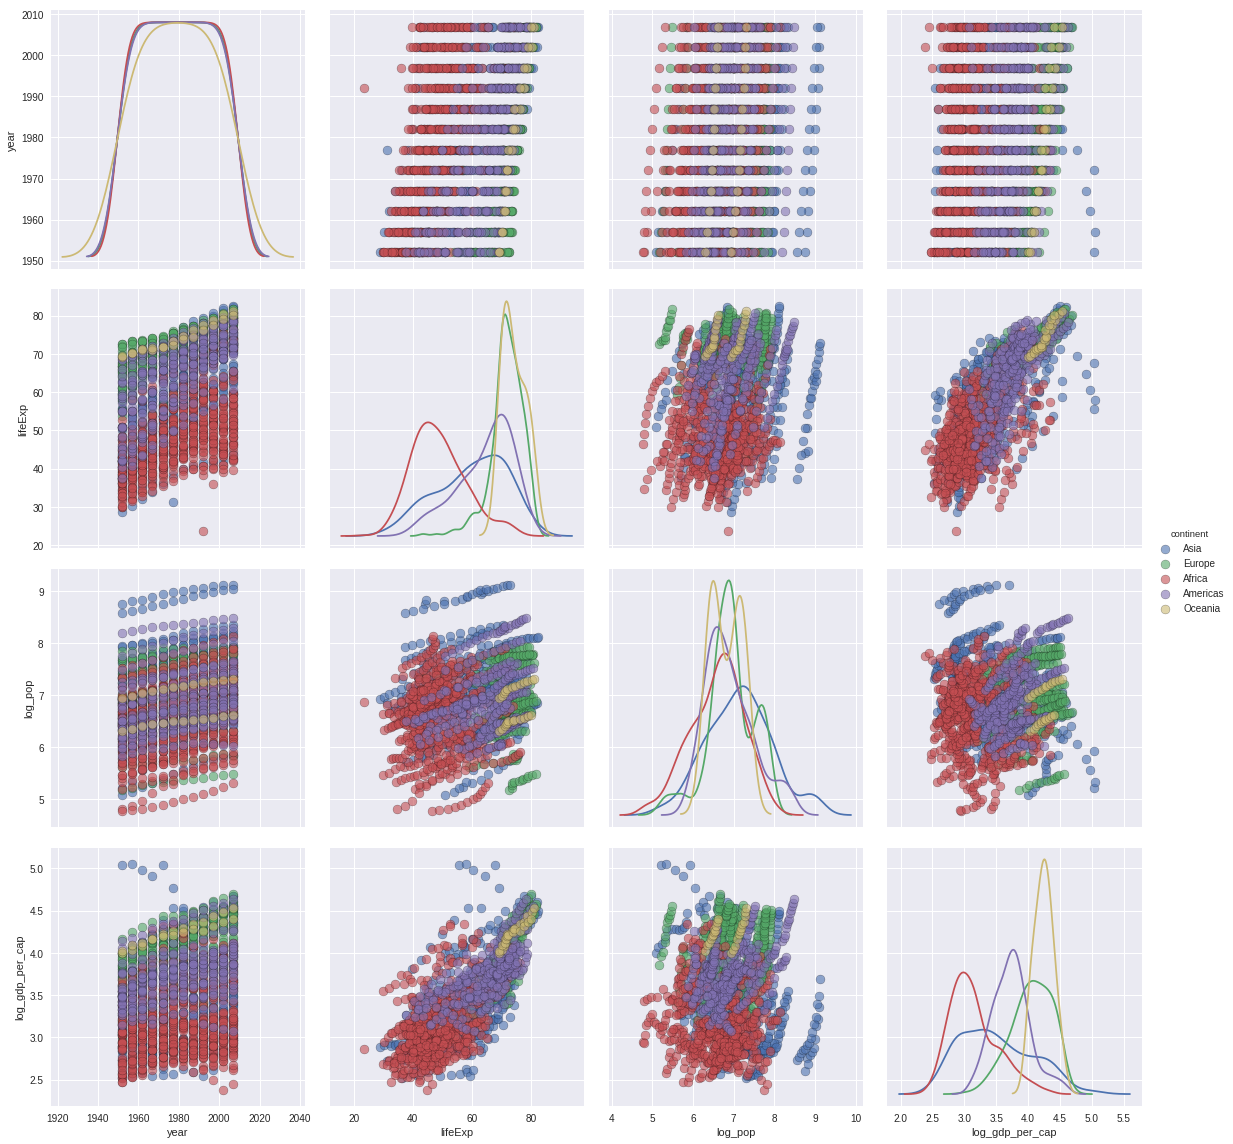

In [39]:
# stacked histograms are also not easily interpretable
# so we can replace them with density plots
# also adjusting the intensity of the scatter plots
# to better show all the data
sns.pairplot(df, hue = 'continent', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4)
plt.show()

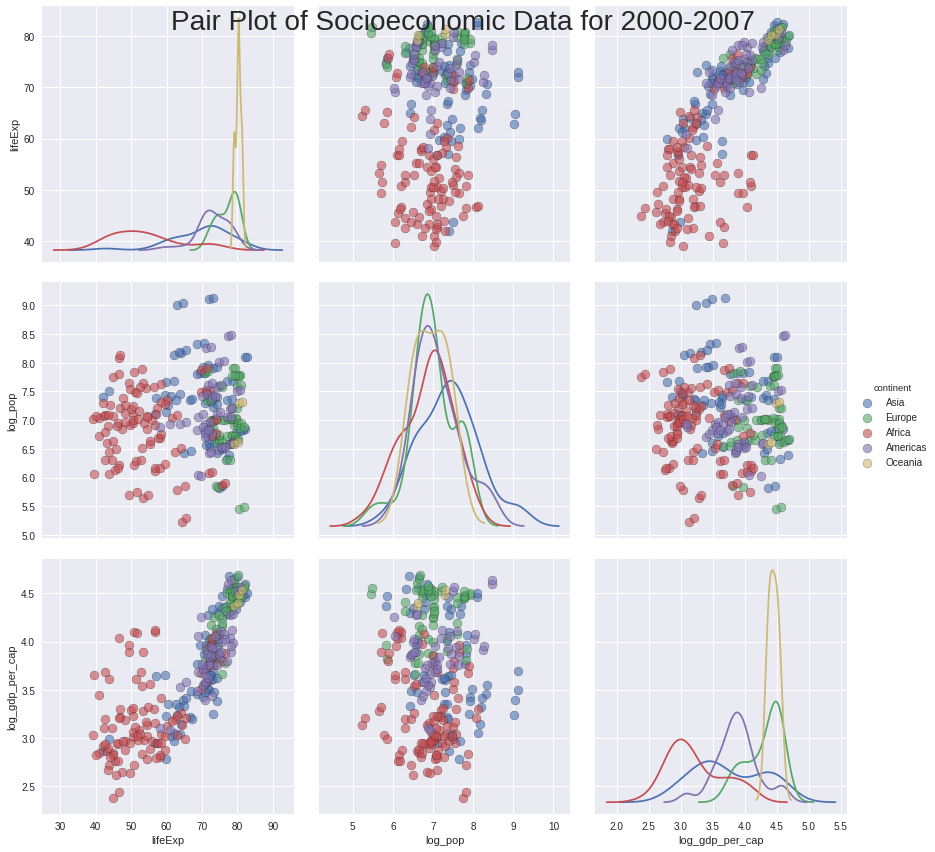

In [44]:
# to reduce clutter plot only only after the year 2000
# and pass vars to pass the list of columns to plot
sns.pairplot(df[df['year'] >= 2000],
             vars = ['lifeExp', 'log_pop', 'log_gdp_per_cap'],
             hue = 'continent', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Title 
plt.suptitle('Pair Plot of Socioeconomic Data for 2000-2007', size = 28);
plt.show()